## **DATA COLLECTION**

### **Data Sources**



### **Python Library**

In [381]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [382]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Data**

In [383]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/UN DATATHON 2023/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [384]:
dataset = pd.read_csv('/content/drive/My Drive/UN DATATHON 2023/Syntax/IRBIprod.csv')
dataset

,MHA.code;BPS.code;GEO.code;Province;Regency.City;IRBI.2018;IRBI.2019;IRBI.2020;IRBI.2021;Prod.2018;Prod.2019;Prod.2020;Prod.2021
0,1101;1103;60700;Aceh;Aceh Selatan;171.2;171.2;...
1,1102;1104;60800;Aceh;Aceh Tenggara;131.2;131.2...
2,1103;1105;60400;Aceh;Aceh Timur;188.8;188.8;17...
3,1104;1106;60500;Aceh;Aceh Tengah;124.8;124.8;1...
4,1105;1107;60600;Aceh;Aceh Barat;203.2;203.2;18...
...,...
509,9209;9109;320500;Papua Barat;Tambrauw;118.4;11...
510,9210;9110;321000;Papua Barat;Maybrat;88;88;88;...
511,9211;9111;321200;Papua Barat;Manokwari Selatan...
512,9212;9112;321100;Papua Barat;Pegunungan Arfak;...


**Finding**:
The data is incorrect because it is only one column with with a semicolon separator.

In [385]:
dataset = pd.read_csv('/content/drive/My Drive/UN DATATHON 2023/Syntax/IRBIprod.csv',sep=';')
dataset

,MHA.code,BPS.code,GEO.code,Province,Regency.City,IRBI.2018,IRBI.2019,IRBI.2020,IRBI.2021,Prod.2018,Prod.2019,Prod.2020,Prod.2021
0,1101,1103,60700,Aceh,Aceh Selatan,171.20,171.20,171.20,171.20,62.29,51.10,54.00,50.21
1,1102,1104,60800,Aceh,Aceh Tenggara,131.20,131.20,127.23,120.03,65.45,66.40,63.72,61.59
2,1103,1105,60400,Aceh,Aceh Timur,188.80,188.80,176.05,166.74,56.40,44.85,49.19,50.45
3,1104,1106,60500,Aceh,Aceh Tengah,124.80,124.80,124.80,124.80,60.38,51.25,47.53,47.16
4,1105,1107,60600,Aceh,Aceh Barat,203.20,203.20,189.04,179.15,45.17,42.83,45.54,51.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,9209,9109,320500,Papua Barat,Tambrauw,118.40,118.40,118.40,118.40,NaN,NaN,NaN,NaN
510,9210,9110,321000,Papua Barat,Maybrat,88.00,88.00,88.00,88.00,NaN,NaN,NaN,NaN
511,9211,9111,321200,Papua Barat,Manokwari Selatan,152.06,152.06,152.06,160.35,28.80,53.77,36.58,55.42
512,9212,9112,321100,Papua Barat,Pegunungan Arfak,152.06,152.06,152.06,160.35,NaN,NaN,NaN,NaN


**Findings**:
- The data is correct; there are column names, and the size is 514 rows x 13 columns.
- There are NaNs (missing values).

## **DATA REVIEW**

### **Data Type Checking**

In [386]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MHA.code      514 non-null    int64  
 1   BPS.code      514 non-null    int64  
 2   GEO.code      514 non-null    int64  
 3   Province      514 non-null    object 
 4   Regency.City  514 non-null    object 
 5   IRBI.2018     514 non-null    float64
 6   IRBI.2019     514 non-null    float64
 7   IRBI.2020     514 non-null    float64
 8   IRBI.2021     514 non-null    float64
 9   Prod.2018     471 non-null    float64
 10  Prod.2019     474 non-null    float64
 11  Prod.2020     470 non-null    float64
 12  Prod.2021     468 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.3+ KB


**Findings**:
- All data types are correct.
- There are missing values in productivity of paddy (Prod) data from 2018 to 2021.

In [387]:
dataset.isnull().values.any() #Jika True artinya ada data yang hilang

True

### **Data Characteristics**

**Descriptive Statistics**

In [388]:
dataset[['IRBI.2018','IRBI.2019','IRBI.2020','IRBI.2021','Prod.2018','Prod.2019','Prod.2020','Prod.2021']].describe()

,IRBI.2018,IRBI.2019,IRBI.2020,IRBI.2021,Prod.2018,Prod.2019,Prod.2020,Prod.2021
count,514.000000,514.000000,514.000000,514.000000,471.000000,474.000000,470.000000,468.000000
mean,146.233502,144.409222,142.116790,138.808599,46.435711,45.735844,45.408149,47.016026
std,32.526825,32.583463,32.130023,31.360961,13.620587,11.450938,11.493064,10.303213
min,44.800000,44.800000,44.800000,44.800000,0.000000,0.000000,0.000000,0.000000
25%,124.400000,123.200000,120.400000,118.812500,38.435000,38.372500,37.527500,39.492500
50%,146.150000,144.090000,140.605000,137.365000,46.710000,46.075000,45.780000,48.080000
75%,168.372500,167.145000,165.590000,161.592500,55.165000,54.105000,54.050000,54.605000
max,223.200000,223.200000,223.200000,223.200000,200.180000,74.530000,75.180000,75.540000


**Findings**:
- The number of data (count) is different, meaning there are missing values in productivity of paddy (Prod) data from 2018 to 2021.
- There is a zero value in the in productivity of paddy (Prod) data from 2018 to 2021 because those cities/regencies do not have agricultural land, so no paddy is produced.

**Visualization using Histogram**

<ipython-input-389-73c2cd1af2d4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["IRBI.2018"], kde = True, bins = 100, color = "brown")


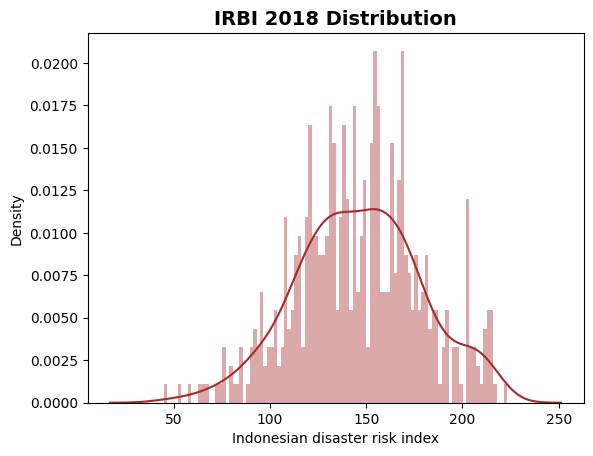

In [389]:
sns.distplot(dataset["IRBI.2018"], kde = True, bins = 100, color = "brown")
plt.title("IRBI 2018 Distribution", size = 14, weight = "bold")
plt.xlabel("Indonesian disaster risk index")
plt.show()

<ipython-input-390-14b77b6bf4b1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["IRBI.2019"], kde = True, bins = 100, color = "brown")


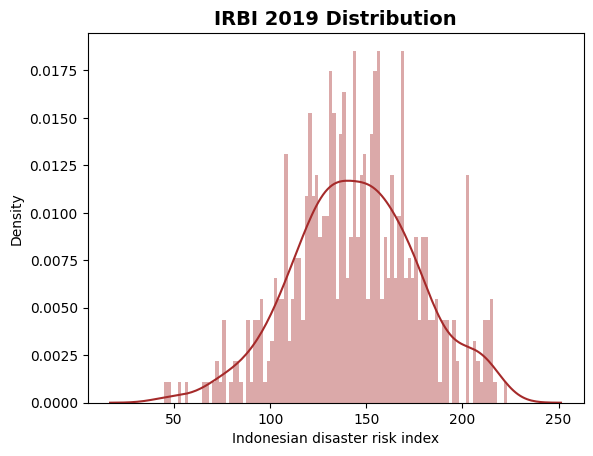

In [390]:
sns.distplot(dataset["IRBI.2019"], kde = True, bins = 100, color = "brown")
plt.title("IRBI 2019 Distribution", size = 14, weight = "bold")
plt.xlabel("Indonesian disaster risk index")
plt.show()

<ipython-input-391-7fdaeaf6941b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["IRBI.2020"], kde = True, bins = 100, color = "brown")


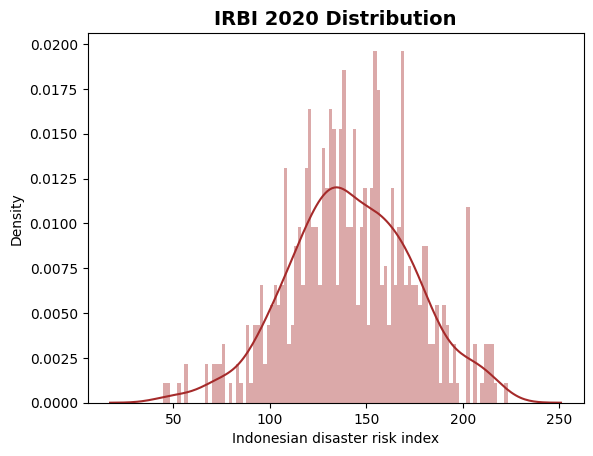

In [391]:
sns.distplot(dataset["IRBI.2020"], kde = True, bins = 100, color = "brown")
plt.title("IRBI 2020 Distribution", size = 14, weight = "bold")
plt.xlabel("Indonesian disaster risk index")
plt.show()

<ipython-input-392-d1934a4c86ab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["IRBI.2021"], kde = True, bins = 100, color = "brown")


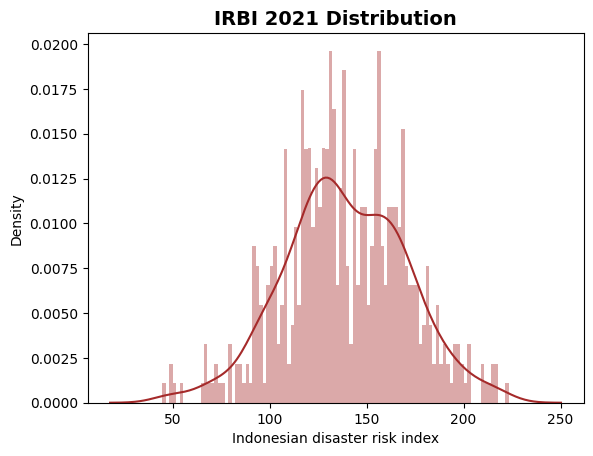

In [392]:
sns.distplot(dataset["IRBI.2021"], kde = True, bins = 100, color = "brown")
plt.title("IRBI 2021 Distribution", size = 14, weight = "bold")
plt.xlabel("Indonesian disaster risk index")
plt.show()

<ipython-input-393-0951d6d4b1b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Prod.2018"], kde = True, bins = 100, color = "brown")


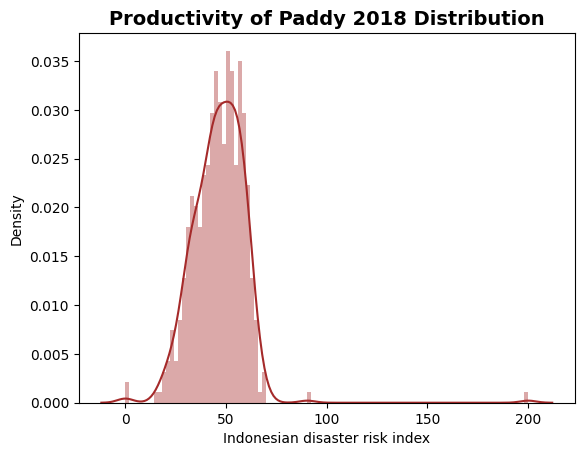

In [393]:
sns.distplot(dataset["Prod.2018"], kde = True, bins = 100, color = "brown")
plt.title("Productivity of Paddy 2018 Distribution", size = 14, weight = "bold")
plt.xlabel("Indonesian disaster risk index")
plt.show()

<ipython-input-394-a5f57a466cd1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Prod.2019"], kde = True, bins = 100, color = "brown")


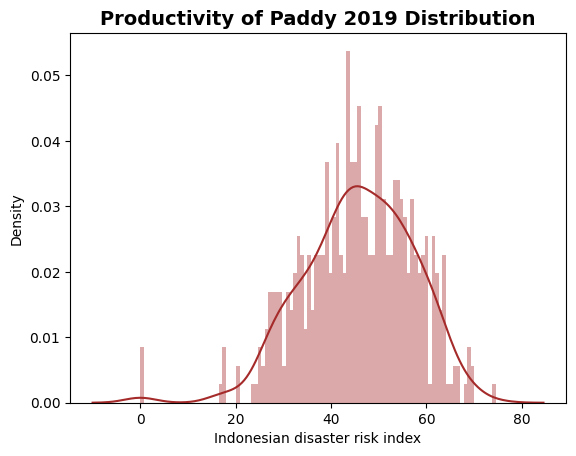

In [394]:
sns.distplot(dataset["Prod.2019"], kde = True, bins = 100, color = "brown")
plt.title("Productivity of Paddy 2019 Distribution", size = 14, weight = "bold")
plt.xlabel("Indonesian disaster risk index")
plt.show()

<ipython-input-395-ada5b1589294>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Prod.2020"], kde = True, bins = 100, color = "brown")


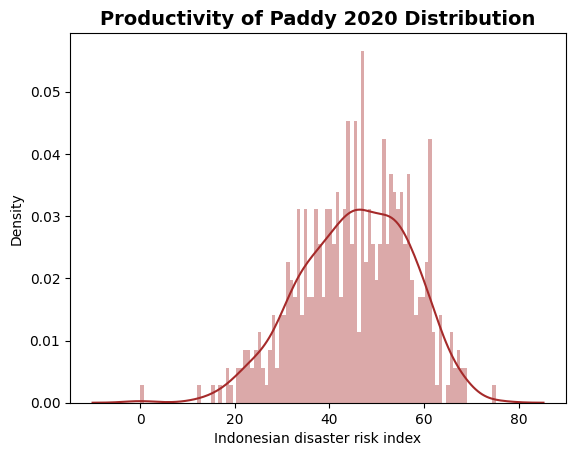

In [395]:
sns.distplot(dataset["Prod.2020"], kde = True, bins = 100, color = "brown")
plt.title("Productivity of Paddy 2020 Distribution", size = 14, weight = "bold")
plt.xlabel("Indonesian disaster risk index")
plt.show()

<ipython-input-396-e4310a802e6f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Prod.2021"], kde = True, bins = 100, color = "brown")


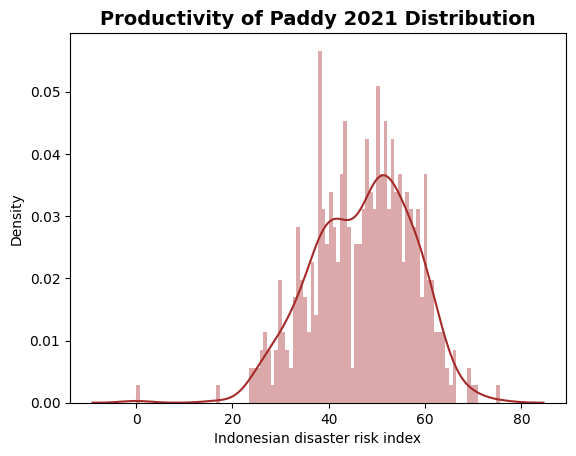

In [396]:
sns.distplot(dataset["Prod.2021"], kde = True, bins = 100, color = "brown")
plt.title("Productivity of Paddy 2021 Distribution", size = 14, weight = "bold")
plt.xlabel("Indonesian disaster risk index")
plt.show()

**Visualization using Boxplot**

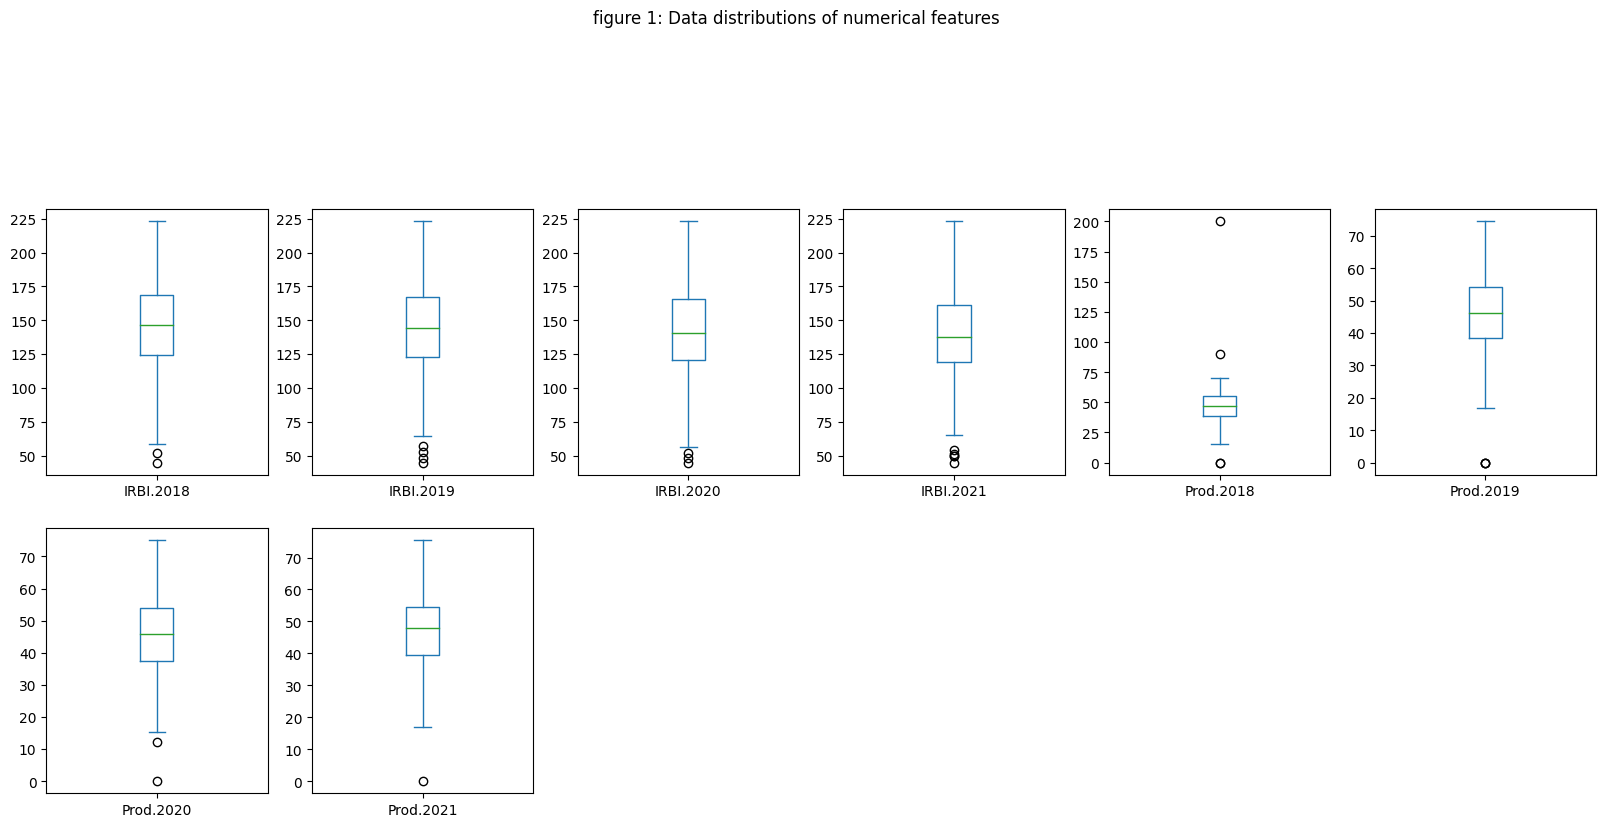

In [397]:
dataset[['IRBI.2018','IRBI.2019','IRBI.2020','IRBI.2021','Prod.2018','Prod.2019','Prod.2020','Prod.2021']].plot(kind='box',subplots=True,layout=(5,6),sharex=False,figsize=(20,20),title='figure 1: Data distributions of numerical features')
plt.show()

Finding: All variables have outliers.

Findings:
-

## **DATA VALIDATION**

**Findings**:
- The data is correct; there are column names, and the size is 514 rows x 13 columns.
- All data types are correct.
- There are NaNs (missing values) in productivity of paddy (Prod) data from 2018 to 2021.

**Recommendation**:
- Missing values in productivity of paddy (Prod) will be handled by imputation using the median because the median is better used for data with outliers.

## **DATA CLEANING**

### **Missing values checking**

In [398]:
dataset.isnull().values.any()

True

In [399]:
dataset.loc[:, dataset.isnull().any()].columns

Index(['Prod.2018', 'Prod.2019', 'Prod.2020', 'Prod.2021'], dtype='object')

In [400]:
dataset.isna().sum()

MHA.code         0
BPS.code         0
GEO.code         0
Province         0
Regency.City     0
IRBI.2018        0
IRBI.2019        0
IRBI.2020        0
IRBI.2021        0
Prod.2018       43
Prod.2019       40
Prod.2020       44
Prod.2021       46
dtype: int64

**Finding**: The number of missing values in productivity of paddy (Prod) data from 2018 to 2021 are 43, 40, 44, and 46, respectively.

### **Handling Missing Values**

In [401]:
#imputation to handle missing value in productivity of paddy in 2018
median_value1=dataset['Prod.2018'].median()
print(median_value1)
dataset['Prod.2018']=dataset['Prod.2018'].fillna(median_value1)

#imputation to handle missing value in productivity of paddy in 2019
median_value2=dataset['Prod.2019'].median()
print(median_value2)
dataset['Prod.2019']=dataset['Prod.2019'].fillna(median_value1)

#imputation to handle missing value in productivity of paddy in 2020
median_value3=dataset['Prod.2020'].median()
print(median_value3)
dataset['Prod.2020']=dataset['Prod.2020'].fillna(median_value1)

#imputation to handle missing value in productivity of paddy in 2021
median_value4=dataset['Prod.2021'].median()
print(median_value4)
dataset['Prod.2021']=dataset['Prod.2021'].fillna(median_value1)


46.71
46.075
45.78
48.08


In [402]:
print(dataset.iloc[[509, 510, 512, 513]])

     MHA.code  BPS.code  GEO.code     Province      Regency.City  IRBI.2018  \
509      9209      9109    320500  Papua Barat          Tambrauw     118.40   
510      9210      9110    321000  Papua Barat           Maybrat      88.00   
512      9212      9112    321100  Papua Barat  Pegunungan Arfak     152.06   
513      9271      9171    326000  Papua Barat       Kota Sorong     176.25   

     IRBI.2019  IRBI.2020  IRBI.2021  Prod.2018  Prod.2019  Prod.2020  \
509     118.40     118.40     118.40      46.71      46.71      46.71   
510      88.00      88.00      88.00      46.71      46.71      46.71   
512     152.06     152.06     160.35      46.71      46.71      46.71   
513     176.25     176.25     176.25      46.71      46.71      46.71   

     Prod.2021  
509      46.71  
510      46.71  
512      46.71  
513      46.71  


In [403]:
dataset.isna().sum()

MHA.code        0
BPS.code        0
GEO.code        0
Province        0
Regency.City    0
IRBI.2018       0
IRBI.2019       0
IRBI.2020       0
IRBI.2021       0
Prod.2018       0
Prod.2019       0
Prod.2020       0
Prod.2021       0
dtype: int64

**Finding**: Missing values have been successfully resolved.

## **Correlation using Heatmap**

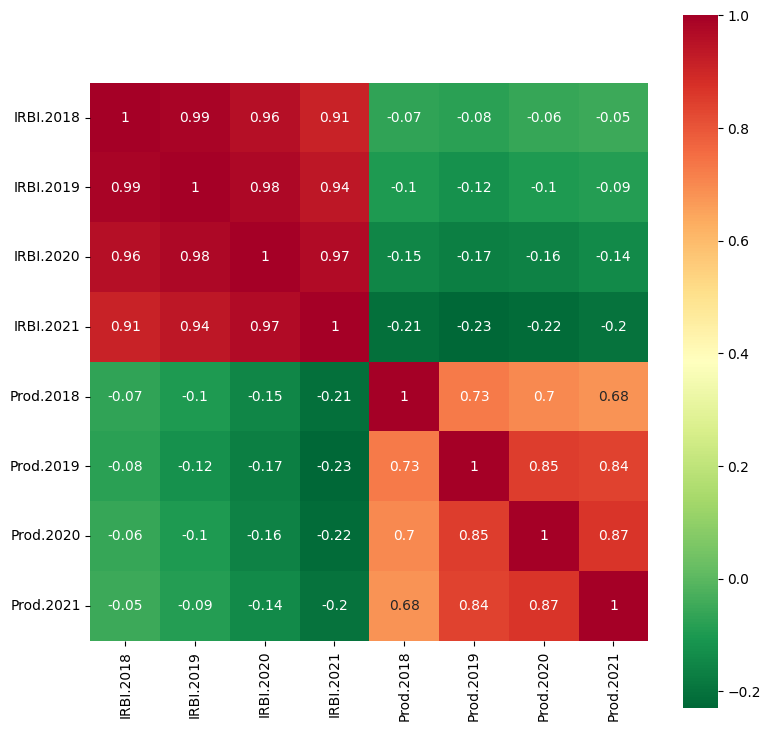

In [404]:
# Correlation Heatmap
dataset_numerik=dataset[['IRBI.2018','IRBI.2019','IRBI.2020','IRBI.2021','Prod.2018','Prod.2019','Prod.2020','Prod.2021']]
correlation = dataset_numerik.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

**Finding**: The correlation between productivity of paddy and disaster risk is negative, meaning that areas with high productivity of paddy generally have a low disaster risk.

## **REGRESSION ANALYSIS**

### **Define the independent and dependent variable**

In [405]:
x1=dataset['IRBI.2018']
x2=dataset['IRBI.2019']
x3=dataset['IRBI.2020']
x4=dataset['IRBI.2021']
y1=dataset['Prod.2018']
y2=dataset['Prod.2019']
y3=dataset['Prod.2020']
y4=dataset['Prod.2021']

### **Explore the data**

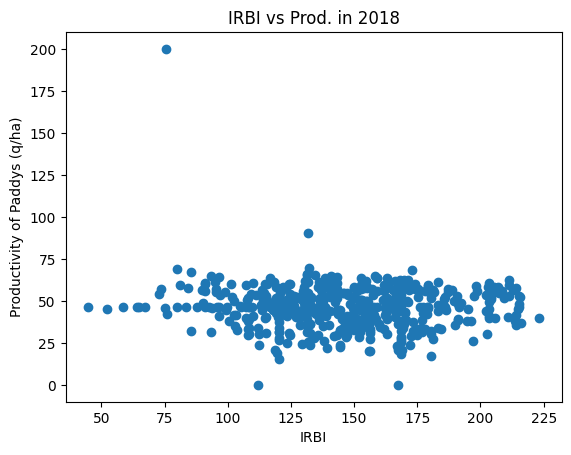

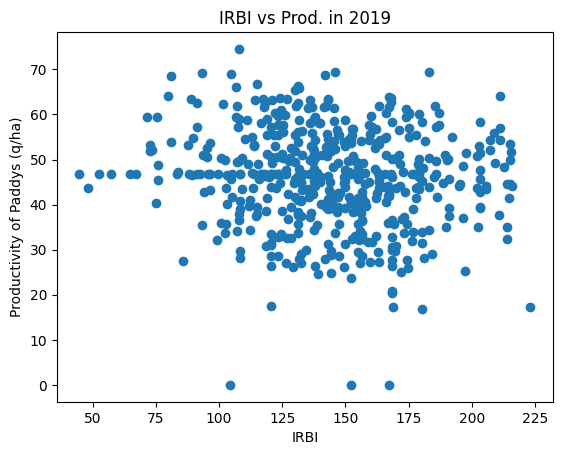

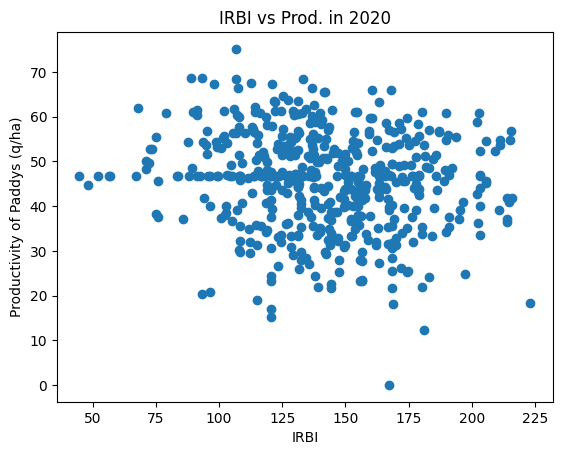

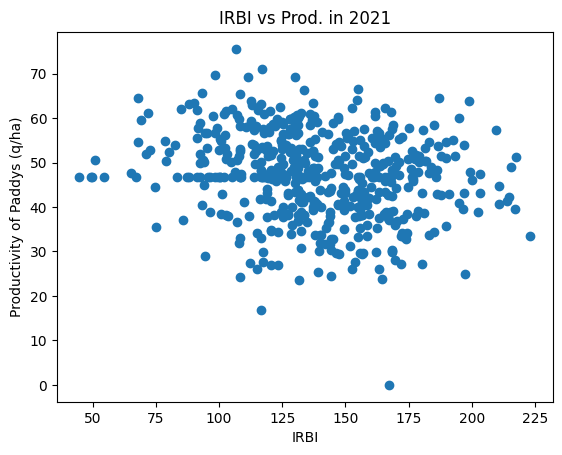

In [406]:
ax = plt.subplot()
plt.scatter(x1,y1)
plt.title('IRBI vs Prod. in 2018')
plt.xlabel('IRBI')
plt.ylabel('Productivity of Paddys (q/ha)')
plt.show()

ax = plt.subplot()
plt.scatter(x2,y2)
plt.title('IRBI vs Prod. in 2019')
plt.xlabel('IRBI')
plt.ylabel('Productivity of Paddys (q/ha)')
plt.show()

ax = plt.subplot()
plt.scatter(x3,y3)
plt.title('IRBI vs Prod. in 2020')
plt.xlabel('IRBI')
plt.ylabel('Productivity of Paddys (q/ha)')
plt.show()

ax = plt.subplot()
plt.scatter(x4,y4)
plt.title('IRBI vs Prod. in 2021')
plt.xlabel('IRBI')
plt.ylabel('Productivity of Paddys (q/ha)')
plt.show()

### **Linear regression**



In [407]:
x01 = sm.add_constant(x1)
result1 = sm.OLS(y1,x01).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Prod.2018   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.260
Date:                Mon, 06 Nov 2023   Prob (F-statistic):              0.133
Time:                        06:15:06   Log-Likelihood:                -2047.6
No. Observations:                 514   AIC:                             4099.
Df Residuals:                     512   BIC:                             4108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.3444      2.648     19.014      0.000      45.143      55.546
IRBI.2018     -0.0266      0.018     -1.503      0.133      -0.061       0.008
==============================================================================
Omnibus:                      401.092   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27401.460
Skew:                           2.773   Prob(JB):                         0.00
Kurtosis:                      38.337   Cond. No.                         691.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Findings**:
- We can say that the intercept (const) coefficient is 50.3444, and the independent variable coefficient is -0.0266 (signifies if IRBI increases by 1 unit, the productivity of paddy decreases by -0.0266 q/ha).
- The p-value of IRBI=0.133 is greater than alpha=0.050, so IRBI is significant in predicting the productivity of paddy.

In [408]:
x02 = sm.add_constant(x2)
result2 = sm.OLS(y2,x02).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Prod.2019   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.886
Date:                Mon, 06 Nov 2023   Prob (F-statistic):            0.00895
Time:                        06:15:06   Log-Likelihood:                -1957.9
No. Observations:                 514   AIC:                             3920.
Df Residuals:                     512   BIC:                             3928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.4269      2.194     23.444      0.000      47.117      55.736
IRBI.2019     -0.0389      0.015     -2.624      0.009      -0.068      -0.010
==============================================================================
Omnibus:                       32.111   Durbin-Watson:                   0.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.014
Skew:                          -0.515   Prob(JB):                     4.57e-10
Kurtosis:                       3.973   Cond. No.                         673.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Findings**:
- We can say that the intercept (const) coefficient is 51.4269, and the independent variable coefficient is -0.0389 (signifies if IRBI increases by 1 unit, the productivity of paddy decreases by -0.0389 q/ha).
- The p-value of IRBI=0.009 is less than alpha=0.050, so IRBI is significant in predicting the productivity of paddy.

In [409]:
x03 = sm.add_constant(x3)
result3 = sm.OLS(y3,x03).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Prod.2020   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     13.22
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           0.000305
Time:                        06:15:06   Log-Likelihood:                -1954.6
No. Observations:                 514   AIC:                             3913.
Df Residuals:                     512   BIC:                             3922.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.2347      2.176     24.469      0.000      48.961      57.509
IRBI.2020     -0.0543      0.015     -3.636      0.000      -0.084      -0.025
==============================================================================
Omnibus:                       13.418   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.758
Skew:                          -0.393   Prob(JB):                      0.00103
Kurtosis:                       3.155   Cond. No.                         661.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Findings**:
- We can say that the intercept (const) coefficient is 53.2347 and the independent variable coefficient is -0.0543 (signifies if IRBI increases by 1 units, the productivity of paddy decreases by -0.0543 q/ha).
- The p-value of IRBI=0.000 is less than 0.050, so IRBI is significant in predicting the productivity of paddy.

In [410]:
x04 = sm.add_constant(x4)
result4 = sm.OLS(y4,x04).fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Prod.2021   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     22.19
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           3.19e-06
Time:                        06:15:06   Log-Likelihood:                -1892.7
No. Observations:                 514   AIC:                             3789.
Df Residuals:                     512   BIC:                             3798.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.8569      1.930     28.941      0.000      52.065      59.649
IRBI.2021     -0.0639      0.014     -4.711      0.000      -0.091      -0.037
==============================================================================
Omnibus:                       17.037   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.802
Skew:                          -0.388   Prob(JB):                     8.26e-05
Kurtosis:                       3.524   Cond. No.                         646.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Findings**:
- We can say that the intercept (const) coefficient is 55.8569, and the independent variable coefficient is -0.0639 (signifies if IRBI increases by 1 unit, the productivity of paddy decreases by -0.0639 q/ha).
- The p-value of IRBI=0.000 is less than alpha=0.050, so IRBI is significant in predicting the productivity of paddy.

### **Correlation for Web Dashboard**

In [ ]:
dataset

In [ ]:
dataIRBI=dataset.iloc[:,0:9]
dataIRBI

In [ ]:
dataY=dataset.iloc[:,0:5]
dataY
dataY['Prod.2018'] = dataset.iloc[:,9]
dataY['Prod.2019'] = dataset.iloc[:,10]
dataY['Prod.2020'] = dataset.iloc[:,11]
dataY['Prod.2021'] = dataset.iloc[:,12]
dataY

In [ ]:
x=dataIRBI.iloc[2,5:9]
y=dataY.iloc[2,5:9]

x.corr(y)

In [434]:
dataset.to_csv('/content/drive/MyDrive/UNDATATHON/DATA/zizah.csv')